[back to intro](intro.ipynb)

In [10]:
import numpy as np
from IPython.display import Audio, display
fs = 44100

In [2]:
np.arange(6)

array([0, 1, 2, 3, 4, 5])

In [3]:
np.arange(0, 0.6, 0.1), np.arange(6) * 0.1  # two possibilities

(array([ 0. ,  0.1,  0.2,  0.3,  0.4,  0.5]),
 array([ 0. ,  0.1,  0.2,  0.3,  0.4,  0.5]))

In [4]:
np.arange(0.5, 1.1, 0.1), "<-- wrong result!"

(array([ 0.5,  0.6,  0.7,  0.8,  0.9,  1. ,  1.1]), '<-- wrong result!')

In [5]:
np.arange(5, 11) * 0.1, "<-- that's right!"

(array([ 0.5,  0.6,  0.7,  0.8,  0.9,  1. ]), "<-- that's right!")

In [6]:
np.linspace(0, 6, 7)

array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.])

In [7]:
np.linspace(0, 6, 6, endpoint=False), np.linspace(0, 5, 6)  # two possibilities

(array([ 0.,  1.,  2.,  3.,  4.,  5.]), array([ 0.,  1.,  2.,  3.,  4.,  5.]))

In [8]:
np.linspace(0, 0.6, 6, endpoint=False), np.linspace(0, 0.5, 6)  # again two possibilities

(array([ 0. ,  0.1,  0.2,  0.3,  0.4,  0.5]),
 array([ 0. ,  0.1,  0.2,  0.3,  0.4,  0.5]))

In [9]:
np.linspace(0.5, 1.1, 6, endpoint=False), np.linspace(0.5, 1, 6)  # and again ...

(array([ 0.5,  0.6,  0.7,  0.8,  0.9,  1. ]),
 array([ 0.5,  0.6,  0.7,  0.8,  0.9,  1. ]))

If the number of elements is known and the step size should be obtained automatically $\Rightarrow$ `np.linspace()`  
If the step size is known an if it's an integer and the number of elements should be obtained automatically $\Rightarrow$ `np.arange()`

If the step size is not an integer:

* If the step size is a fraction of integers, you can use `np.arange()` with integers and divide the result accordingly.

* If that's not feasible, calculate the expected number of elements beforehand and use `np.linspace()`

In [10]:
dur, amp, freq, fs = 1, 0.3, 500, 44100
t = np.arange(np.ceil(dur * fs)) / fs
y = amp * np.sin(2 * np.pi * freq * t)

alternative (but inferior) methods to get $t$:

In [11]:
t1 = np.arange(0, dur, 1/fs)  # implicit rounding of dur!
t2 = np.arange(0, np.round(dur), 1/fs)  # still problematic: arange with floats
# wrong if dur isn't an integer multiple of 1/fs:
t3 = np.linspace(0, dur, np.round(dur * fs), endpoint=False)

Length of `y` must be *exactly* 44100 (using a half-open interval for $t$), not 44101 (which would be longer than 1 second).

Plotting: 2 ways to zoom (there are probably more): draw a rectangle, drag with the right mouse button in pan/zoom mode.

Clicks? Because of discontinuities (also in the derivatives) $\Rightarrow$ Fade in/out! 

In [3]:
def mysine(frequency, amplitude, duration):
    """Generate sine tone with the given parameters @ 44.1 kHz."""
    fs = 44100
    times = np.arange(np.ceil(duration * fs)) / fs
    return amplitude * np.sin(2 * np.pi * frequency * times)

In [6]:
z = mysine(440, 0.4, 3)

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt

def myplot(data):
    """Create a simple plot @ 44.1 kHz."""
    fs = 44100
    times = np.arange(len(data)) / fs
    plt.plot(times, data)
    plt.xlabel("Time / Seconds")

In [15]:
def myplay(data, rate=44100):
    """Create a small wrapper for playing audio"""
    display(Audio(data=data, rate=rate))

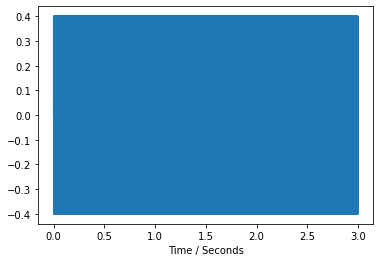

In [7]:
myplot(mysine(440, 0.4, 3))

In [20]:
# Die "tools" Bibliothek haben wir nicht, hier fehlt noch eine eigene Lösung!
from scipy import signal

f0, f1 = 100, 5000  # Hz
amp = 0.2
dur = 2  # seconds
fadetime = 2000  # samples
fs = 44100

t = np.arange(np.ceil(dur * fs)) / fs

for method in 'linear', 'log':
    sweep = amp * signal.chirp(t, f0, dur, f1, method)
    sweep = tools.fade(sweep, fadetime)
    sf.write('sweep_{}.wav'.format(method), sweep, fs) # muss ersetzt werden durch pythons "wave" Bibliothek

In [11]:
sinetone = mysine(frequency=500, amplitude=0.3, duration=1.5)
noise = np.random.normal(scale=0.1, size=len(sinetone))
sine_plus_noise = sinetone + noise

In [12]:
display(Audio(data=sine_plus_noise, rate=fs))

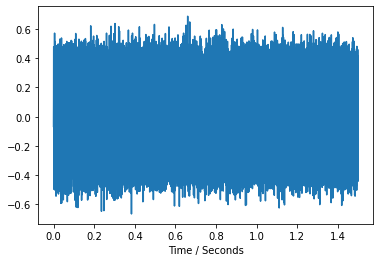

In [13]:
myplot(sine_plus_noise)

In [14]:
dur = 2
amp = 0.2

two_sines = mysine(500, amp, dur) + mysine(507, amp, dur)

In [16]:
myplay(two_sines)

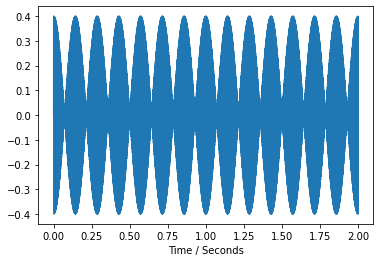

In [17]:
myplot(two_sines)

Two sine tones with similar frequencies create "beats", see <http://en.wikipedia.org/wiki/Beat_(acoustics)>.
The sum of these two tones is equivalent to an amplitude modulation with a carrier frequency of $\frac{f_1+f_2}{2}$ and a modulation frequency of $\frac{f_1-f_2}{2}$.

$$\cos(2\pi f_1t)+\cos(2\pi f_2t) = 2\cos\left(2\pi\frac{f_1+f_2}{2}t\right)\cos\left(2\pi\frac{f_1-f_2}{2}t\right)$$

We don't really *hear* the modulation frequency itself, we only hear the envelope of the modulation, therefore the *perceived* beat frequency is $f_{\text{beat}} = f_1-f_2$.

In [21]:
stereo_sines = np.column_stack([mysine(400, amp, dur), mysine(600, amp, dur)])

error: ushort format requires 0 <= number <= (0x7fff * 2 + 1)

In [19]:
myplay(stereo_sines) # doesn't work yet

error: ushort format requires 0 <= number <= (0x7fff * 2 + 1)

The first column should be the left channel!

In [29]:
dur, amp = 1, 0.3
freq = 500  # Hz
delay = 0.5  # ms
fs = 44100

t = np.arange(np.ceil(dur * fs)) / fs
times = np.column_stack((t, t - delay/1000))
sig = amp * np.sin(2 * np.pi * freq * times)

In [30]:
myplay(sig)

In [31]:
dur, amp = 0.5, 0.3
frequencies = 500, 1000, 2000  # Hz
delays = 0.6, 0.4, 0.2, 0, -0.2, -0.4, -0.6  # ms
fs = 44100

t = np.arange(np.ceil(dur * fs)) / fs

for f in frequencies:
    for delay in delays:
        times = np.column_stack((t, t - delay/1000))
        sig = amp * np.sin(2 * np.pi * f * times)
        myplay(sig)
        sd.wait()

This is supposed to illustrate [Lord Rayleigh's Duplex Theory](http://en.wikipedia.org/wiki/Interaural_time_difference#Duplex_theory) (at least the part about time differences).

In [32]:
dur, amp = 2, 0.3
frequencies = np.array([200, 400, 600, 800, 1000])
fs = 44100
t = np.arange(np.ceil(dur * fs)) / fs
t.shape = -1, 1
t

array([[  0.00000000e+00],
       [  2.26757370e-05],
       [  4.53514739e-05],
       ..., 
       [  1.99993197e+00],
       [  1.99995465e+00],
       [  1.99997732e+00]])

In [33]:
amplitudes = amp * 1 / np.arange(1, len(frequencies)+1)
amplitudes

array([ 0.3  ,  0.15 ,  0.1  ,  0.075,  0.06 ])

In [34]:
five_sines = amplitudes * np.sin(2 * np.pi * frequencies * t)
five_sines.shape

(88200, 5)

In [35]:
sum_of_sines = five_sines.sum(axis=1)

In [36]:
myplot(sum_of_sines)

In [37]:
myplay(five_sines[:, [0, 1, 2, 3, 4]].sum(axis=1))

In [38]:
myplay(five_sines[:, [0, 1, 2, 3]].sum(axis=1))

In [39]:
myplay(five_sines[:, [0, 1, 2, 4]].sum(axis=1))

In [40]:
myplay(five_sines[:, [0, 1, 3, 4]].sum(axis=1))

In [41]:
myplay(five_sines[:, [0, 2, 3, 4]].sum(axis=1))

In [42]:
myplay(five_sines[:, [1, 2, 3, 4]].sum(axis=1))

<https://en.wikipedia.org/wiki/Harmonic_series_(music)>

In [43]:
f0 = 200  # Hz
partials = 20

frequencies = f0 * np.arange(1, partials + 1)
frequencies

array([ 200,  400,  600,  800, 1000, 1200, 1400, 1600, 1800, 2000, 2200,
       2400, 2600, 2800, 3000, 3200, 3400, 3600, 3800, 4000])

In [44]:
amplitudes = amp * 1 / np.arange(1, len(frequencies)+1)
amplitudes

array([ 0.3       ,  0.15      ,  0.1       ,  0.075     ,  0.06      ,
        0.05      ,  0.04285714,  0.0375    ,  0.03333333,  0.03      ,
        0.02727273,  0.025     ,  0.02307692,  0.02142857,  0.02      ,
        0.01875   ,  0.01764706,  0.01666667,  0.01578947,  0.015     ])

In [45]:
many_sines = amplitudes * np.sin(2 * np.pi * frequencies * t)
many_sines.shape

(88200, 20)

In [46]:
sawtooth = many_sines.sum(axis=1)

In [47]:
myplot(sawtooth)

In [48]:
myplay(sawtooth)

https://en.wikipedia.org/wiki/Sawtooth_wave

In [49]:
square = many_sines[:, ::2].sum(axis=1)

In [50]:
myplot(square)

In [51]:
myplay(square)

https://en.wikipedia.org/wiki/Square_wave

<p xmlns:dct="http://purl.org/dc/terms/">
  <a rel="license"
     href="http://creativecommons.org/publicdomain/zero/1.0/">
    <img src="http://i.creativecommons.org/p/zero/1.0/88x31.png" style="border-style: none;" alt="CC0" />
  </a>
  <br />
  To the extent possible under law,
  <span rel="dct:publisher" resource="[_:publisher]">the person who associated CC0</span>
  with this work has waived all copyright and related or neighboring
  rights to this work.
</p>